Perceptron Accuracy: 0.97


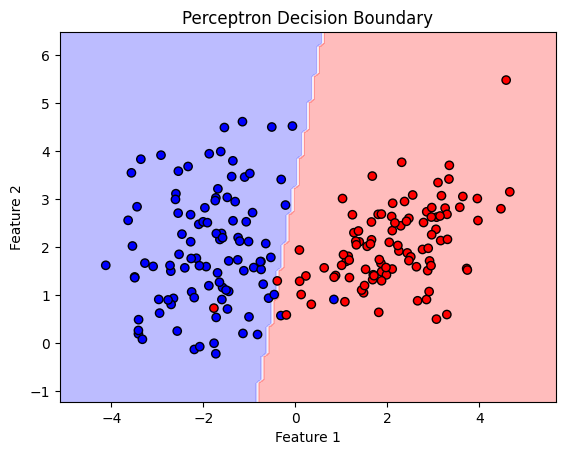

In [8]:
#Perceptron algorithm code here:
#Load and import!
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# First we're going to generate a linearly separable dataset
X, y = make_classification(n_samples=200, n_features=2, n_informative=2, 
                           n_redundant=0, n_clusters_per_class=1, class_sep=2.0, 
                           random_state=42)

# Next we split data into training and testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Time to train the Perceptron Model
perceptron = Perceptron(max_iter=1000, tol=1e-3, random_state=42)  # Maximum 1000 iterations
perceptron.fit(X_train, y_train)

# Now make Predictions and Evaluate the Model
y_pred = perceptron.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Perceptron Accuracy: {accuracy:.2f}")

# Here we will visualize the decision boundary 
def plot_decision_boundary(model, X, y):
    # Create a mesh grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    
    # This is to predict for each point in the mesh grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    #Plot decision boundary
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='bwr')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k')
    plt.title("Perceptron Decision Boundary")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

# Call the function to plot
plot_decision_boundary(perceptron, X, y)


Perceptron Accuracy: {accuracy_perceptron:.2f}
SVM Accuracy: 0.95


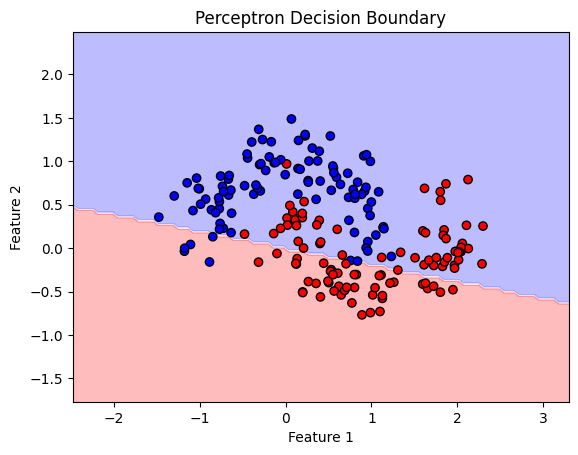

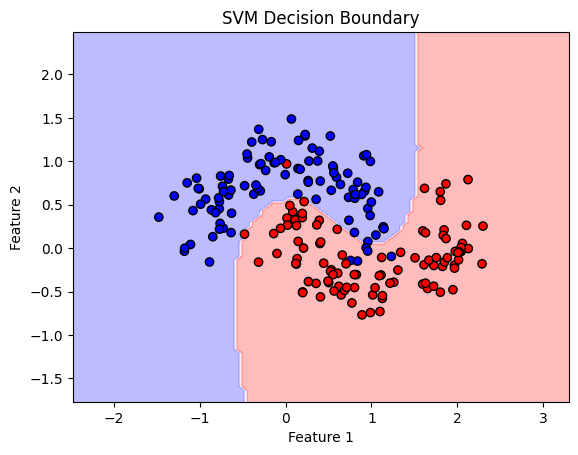

In [10]:
#Comapring Perceptron with SVM
from sklearn.svm import SVC 
from sklearn.datasets import make_moons


# Generate non-linearly separable data
X, y = make_moons(n_samples=200, noise=0.2, random_state=42)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train!!
perceptron = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
perceptron.fit(X_train, y_train)
y_pred_perceptron = perceptron.predict(X_test)
accuracy_perceptron = accuracy_score(y_test, y_pred_perceptron)

# Train SVM with RBF kernel
svm = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

# Print the accuracy
print("Perceptron Accuracy: {accuracy_perceptron:.2f}")
print(f"SVM Accuracy: {accuracy_svm:.2f}")

# Function to plot decision boundaries
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap='bwr')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k')
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

#Finally Plot decision boundaries
plot_decision_boundary(perceptron, X, y, "Perceptron Decision Boundary")
plot_decision_boundary(svm, X, y, "SVM Decision Boundary")
